<h1><center>DataWareHouse project, ECommerce app</center></h1>

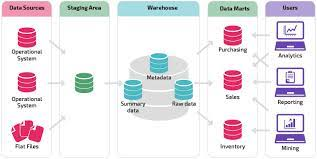

### I will start from Transactional Database Schema, and fill sample values into tables using 'Faker' library python

### Tables are as follows

- __Customer__ 
  - *CustomerID* INT
  - *FirstName* VARCHAR(255)
  - *LastName* VARCHAR(255)
  - *Email* VARCHAR(255)
  - *Phone* VARCHAR(20)
  - *Country* VARCHAR(100)<br><br>
    
- **PaymentMethod**
    - *PaymentID* INT
    - *PaymentMethod* VARCHAR(50)<br><br>

- **OrderItem**
  - *OrderItemID* INT
  - *OrderID* INT
  - *ProductID* INT
  - *Quantity* INT
  - *SupplierID* INT
  - *Subtotal* DECIMAL(10, 2)
  - *Discount* DECIMAL(5, 2)

- **Orders**
  - *OrderID* INT
  - *CustomerID* INT
  - *OrderDate* DATE
  - *CampaignID* INT
  - *Amount* INT
  - *PaymentID* DECIMAL(10, 2)<br><br>
  
- **Supplier**
    - *SupplierID* INT
    - *SupplierName* VARCHAR(255)
    - *ContactEmail* VARCHAR(255)
    - *PhoneNumber* VARCHAR(20)<br><br>
    
- **Returns**
  - *ReturnID* INT
  - *OrderID* INT
  - *ReturnDate* DATE
  - *Reason* TEXT
  - *AmountRefunded* DECIMAL(10, 2)<br><br>
  
  
- **MarketingCampaign**
  - *CampaignID* INT
  - *CampaignName* VARCHAR(255)
  - *StartDate* DATE
  - *EndDate* DATE<br><br>


- **Category**
  - *CategoryID* INT
  - *CategoryName* VARCHAR(50)<br><br>


- **SubCategory**
  - *SubCategoryID* INT
  - *SubCategoryName* VARCHAR(50)
  - *CategoryID* INT<br><br>


- **Product**
  - *ProductID* INT
  - *Name* VARCHAR(255)
  - *Price* DECIMAL(10, 2)
  - *Description* TEXT
  - *SubCategoryID* INT<br><br>


- **CampaignSubCategoryID**
  - *CampaignSubCategoryID* INT
  - *CampaignID* INT
  - *SubCategoryID* INT
  - *Discount* DECIMAL(5, 2)<br><br>




## Installation Of faker library 

In [3]:
!pip install faker

     ---------------------------------------- 1.7/1.7 MB 121.3 kB/s eta 0:00:00


## Python Code to Populate the Tables Using Faker

### -: Customer

In [15]:
import psycopg2
from faker import Faker

fake = Faker()

# Connect to the PostgreSQL database
conn = psycopg2.connect(
    database="production",
    user="postgres",
    password="swati",
    host="localhost",
    port="5432"
)
cursor = conn.cursor()

# Create Customer table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Customer (
        CustomerID SERIAL PRIMARY KEY,
        FirstName VARCHAR(255),
        LastName VARCHAR(255),
        Email VARCHAR(255) UNIQUE,
        Country VARCHAR(100)
    )
''')

CUST_RECORDS_TO_PUT_TABLE = 500

# Generate and insert fake data
for _ in range(CUST_RECORDS_TO_PUT_TABLE):  # Adjust the number of entries as needed
    cursor.execute('''
        INSERT INTO Customer (FirstName, LastName, Email, Country)
        VALUES (%s, %s, %s, %s)
    ''', (fake.first_name(), fake.last_name(), fake.email(), fake.country()))

# Commit changes and close the connection
conn.commit()
conn.close()


### -: Product category and sub category

In [17]:
import psycopg2
from faker import Faker

fake = Faker()

# Connect to the PostgreSQL database
conn = psycopg2.connect(
    database="production",
    user="postgres",
    password="swati",
    host="localhost",
    port="5432"
)
cursor = conn.cursor()

# Create Category table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Category (
        CategoryID SERIAL PRIMARY KEY,
        CategoryName VARCHAR(50) UNIQUE
    )
''')

# Create Subcategory table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Subcategory (
        SubcategoryID SERIAL PRIMARY KEY,
        SubcategoryName VARCHAR(50),
        CategoryID INT,
        FOREIGN KEY (CategoryID) REFERENCES Category(CategoryID)
    )
''')

# List of realistic e-commerce category names
categories = [
    "Electronics",
    "Clothing",
    "Home & Kitchen",
    "Books",
    "Sports & Outdoors",
    "Toys & Games",
    "Beauty & Personal Care",
    "Health & Household",
    "Automotive",
    "Tools & Home Improvement",
    "Office Products",
    "Grocery",
    "Pet Supplies",
    "Musical Instruments",
    "Movies & TV",
    "Video Games",
    "Jewelry",
    "Computers",
    "Shoes",
    "Watches"
]

# Dictionary mapping categories to subcategories
subcategory_dict = {
    "Electronics": ["Smartphones", "Laptops", "Headphones", "Cameras", "Wearables"],
    "Clothing": ["T-Shirts", "Dresses", "Jeans", "Sweaters", "Activewear"],
    "Home & Kitchen": ["Furniture", "Cookware", "Bedding", "Appliances", "Decor"],
    "Books": ["Fiction", "Non-Fiction", "Mystery", "Science Fiction", "Biography"],
    "Sports & Outdoors": ["Outdoor Clothing", "Exercise Equipment", "Camping Gear", "Sports Shoes", "Bicycles"],
    "Toys & Games": ["Board Games", "Action Figures", "Puzzles", "Dolls", "Educational Toys"],
    "Beauty & Personal Care": ["Skincare", "Haircare", "Makeup", "Fragrances", "Personal Hygiene"],
    "Health & Household": ["Vitamins", "Medical Supplies", "Cleaning Products", "Pet Care", "Health Monitors"],
    "Automotive": ["Car Parts", "Car Accessories", "Oil & Lubricants", "Tools", "Electronics"],
    "Tools & Home Improvement": ["Power Tools", "Hand Tools", "Home Security", "Lighting", "Paint"],
    "Office Products": ["Office Furniture", "Stationery", "Printers", "Computers", "Desk Accessories"],
    "Grocery": ["Fresh Produce", "Beverages", "Snacks", "Canned Goods", "Bakery"],
    "Pet Supplies": ["Dog Food", "Cat Food", "Pet Toys", "Grooming", "Pet Beds"],
    "Musical Instruments": ["Guitars", "Keyboards", "Drums", "Wind Instruments", "DJ Equipment"],
    "Movies & TV": ["Action & Adventure", "Drama", "Comedy", "Science Fiction", "Documentaries"],
    "Video Games": ["Action", "Adventure", "Role-Playing", "Sports", "Simulation"],
    "Jewelry": ["Rings", "Necklaces", "Bracelets", "Earrings", "Watches"],
    "Computers": ["Laptops", "Desktops", "Monitors", "Accessories", "Networking"],
    "Shoes": ["Running Shoes", "Casual Shoes", "Boots", "Sandals", "Athletic Shoes"],
    "Watches": ["Analog Watches", "Digital Watches", "Smartwatches", "Luxury Watches", "Sports Watches"]
}

# Generate and insert fake data for categories
for category in categories:
    cursor.execute('''
        INSERT INTO Category (CategoryName)
        VALUES (%s)
    ''', (category,))

# Generate and insert fake data for subcategories
for category, subcategories in subcategory_dict.items():
    category_id_query = 'SELECT CategoryID FROM Category WHERE CategoryName = %s'
    cursor.execute(category_id_query, (category,))
    category_id = cursor.fetchone()[0]

    for subcategory in subcategories:
        cursor.execute('''
            INSERT INTO Subcategory (SubcategoryName, CategoryID)
            VALUES (%s, %s)
        ''', (subcategory, category_id))

# Commit changes and close the connection
conn.commit()
conn.close()


### :- products

In [20]:
import psycopg2
from faker import Faker

fake = Faker()

# Connect to the PostgreSQL database
conn = psycopg2.connect(
    database="production",
    user="postgres",
    password="swati",
    host="localhost",
    port="5432"
)
cursor = conn.cursor()

# Create Product table if not exists
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Product (
        ProductID SERIAL PRIMARY KEY,
        Name VARCHAR(255),
        Price DECIMAL(10, 2),
        Description TEXT,
        SubCategoryID INT,
        FOREIGN KEY (SubCategoryID) REFERENCES Subcategory(SubcategoryID)
    )
''')

# Dictionary mapping categories to subcategories
subcategory_dict = {
    "Electronics": ["Smartphones", "Laptops", "Headphones", "Cameras", "Wearables"],
    "Clothing": ["T-Shirts", "Dresses", "Jeans", "Sweaters", "Activewear"],
    "Home & Kitchen": ["Furniture", "Cookware", "Bedding", "Appliances", "Decor"],
    "Books": ["Fiction", "Non-Fiction", "Mystery", "Science Fiction", "Biography"],
    "Sports & Outdoors": ["Outdoor Clothing", "Exercise Equipment", "Camping Gear", "Sports Shoes", "Bicycles"],
    "Toys & Games": ["Board Games", "Action Figures", "Puzzles", "Dolls", "Educational Toys"],
    "Beauty & Personal Care": ["Skincare", "Haircare", "Makeup", "Fragrances", "Personal Hygiene"],
    "Health & Household": ["Vitamins", "Medical Supplies", "Cleaning Products", "Pet Care", "Health Monitors"],
    "Automotive": ["Car Parts", "Car Accessories", "Oil & Lubricants", "Tools", "Electronics"],
    "Tools & Home Improvement": ["Power Tools", "Hand Tools", "Home Security", "Lighting", "Paint"],
    "Office Products": ["Office Furniture", "Stationery", "Printers", "Computers", "Desk Accessories"],
    "Grocery": ["Fresh Produce", "Beverages", "Snacks", "Canned Goods", "Bakery"],
    "Pet Supplies": ["Dog Food", "Cat Food", "Pet Toys", "Grooming", "Pet Beds"],
    "Musical Instruments": ["Guitars", "Keyboards", "Drums", "Wind Instruments", "DJ Equipment"],
    "Movies & TV": ["Action & Adventure", "Drama", "Comedy", "Science Fiction", "Documentaries"],
    "Video Games": ["Action", "Adventure", "Role-Playing", "Sports", "Simulation"],
    "Jewelry": ["Rings", "Necklaces", "Bracelets", "Earrings", "Watches"],
    "Computers": ["Laptops", "Desktops", "Monitors", "Accessories", "Networking"],
    "Shoes": ["Running Shoes", "Casual Shoes", "Boots", "Sandals", "Athletic Shoes"],
    "Watches": ["Analog Watches", "Digital Watches", "Smartwatches", "Luxury Watches", "Sports Watches"]
}

# Generate and insert category-specific data for products
for category, sub_category_list in subcategory_dict.items():
    for sub_category in sub_category_list:
        # Get SubcategoryID for the current subcategory
        subcategory_id_query = 'SELECT SubcategoryID FROM Subcategory WHERE SubcategoryName = %s'
        cursor.execute(subcategory_id_query, (sub_category,))
        subcategory_id = cursor.fetchone()[0]

        # Define category-specific product names and descriptions
        product_names = [
            f"{sub_category} - Product {i + 1}" for i in range(5)
        ]
        product_descriptions = [
            f"This is a description for {sub_category} - Product {i + 1}" for i in range(5)
        ]

        # Insert category-specific product data into the Product table
        for i in range(5):  # Limit to 5 products per subcategory
            cursor.execute('''
                INSERT INTO Product (Name, Price, Description, SubCategoryID)
                VALUES (%s, %s, %s, %s)
            ''', (product_names[i], abs(fake.pydecimal(left_digits=3, right_digits=2)), product_descriptions[i], subcategory_id))

# Commit changes and close the connection
conn.commit()
conn.close()


### :- Campaign

In [26]:
import psycopg2

# SQL queries
create_table_query = '''
    CREATE TABLE IF NOT EXISTS MarketingCampaign (
        CampaignID SERIAL PRIMARY KEY,
        CampaignName VARCHAR(255),
        StartDate DATE,
        EndDate DATE
    );
'''

insert_data_query = '''
    INSERT INTO MarketingCampaign (CampaignName, StartDate, EndDate)
    VALUES
        ('NewYearSale', '2023-01-01', '2023-01-10'),
        ('ValentinesDayPromo', '2023-02-01', '2023-02-14'),
        ('SpringClearance', '2023-03-20', '2023-03-31'),
        ('EasterSpecial', '2023-04-01', '2023-04-10'),
        ('SummerFiesta', '2023-06-21', '2023-07-04'),
        ('BackToSchool', '2023-08-15', '2023-09-15'),
        ('HalloweenSale', '2023-10-15', '2023-10-31'),
        ('BlackFridayDeals', '2023-11-24', '2023-11-27'),
        ('CyberMonday', '2023-11-28', '2023-11-28'),
        ('HolidayCelebration', '2023-12-01', '2023-12-25');
'''

# Connect to the database
conn = psycopg2.connect(
    database="production",
    user="postgres",
    password="swati",
    host="localhost",
    port="5432"
)
cursor = conn.cursor()

# Execute queries
try:
    cursor.execute(create_table_query)
    conn.commit()
    cursor.execute(insert_data_query)
    conn.commit()
    print("Table created and data inserted successfully!")
except Exception as e:
    print(f"Error: {e}")
finally:
    # Close the connection
    cursor.close()
    conn.close()


Table created and data inserted successfully!


### :- SubCategory Discounts for campaigns

In [30]:
import psycopg2
from psycopg2.extras import execute_values
from random import uniform

# SQL query to create CampaignProductCategory table
create_table_query = '''
    CREATE TABLE IF NOT EXISTS CampaignProductCategory (
        CampaignSubCategoryID SERIAL PRIMARY KEY,
        CampaignID INT,
        SubCategoryID INT,
        Discount DECIMAL(3, 2),
        FOREIGN KEY (CampaignID) REFERENCES MarketingCampaign(CampaignID),
        FOREIGN KEY (SubCategoryID) REFERENCES SubCategory(SubCategoryID)
    );
'''

# SQL query to insert data with random discounts
insert_data_query = '''
    INSERT INTO CampaignProductCategory (CampaignID, SubCategoryID, Discount) VALUES %s;
'''

# Connect to the database
conn = psycopg2.connect(
    database="production",
    user="postgres",
    password="swati",
    host="localhost",
    port="5432"
)
cursor = conn.cursor()

# Execute queries
try:
    # Create the CampaignProductCategory table
    cursor.execute(create_table_query)
    conn.commit()

    # Generate data with random discounts
    data_values = []
    for campaign_id in range(1, 11):  # Assuming you have 10 campaigns
        for sub_category_id in range(1, 21):  # Assuming you have 20 subcategories
            discount = round(uniform(0.05, 0.25), 2)
            data_values.append((campaign_id, sub_category_id, discount))

    # Insert the generated data
    execute_values(cursor, insert_data_query, data_values)
    conn.commit()

    print("Table created and data inserted successfully!")
except Exception as e:
    print(f"Error: {e}")
finally:
    # Close the connection
    cursor.close()
    conn.close()


Table created and data inserted successfully!


In [31]:
import psycopg2
from faker import Faker
from psycopg2.extras import execute_values

# SQL query to create Supplier table
create_supplier_table_query = '''
    CREATE TABLE IF NOT EXISTS Supplier (
        SupplierID SERIAL PRIMARY KEY,
        SupplierName VARCHAR(255),
        ContactEmail VARCHAR(255),
        Email VARCHAR(255)
    );
'''

# SQL query to insert data into Supplier table
insert_supplier_query = '''
    INSERT INTO Supplier (SupplierName, ContactEmail, Email)
    VALUES %s;
'''

# Number of suppliers to generate
num_suppliers = 50

# Create Faker instance
fake = Faker()

# Generate sample data for suppliers using Faker
sample_suppliers = [
    (fake.company(), fake.email(), fake.email()) for _ in range(num_suppliers)
]

# Connect to the database
conn = psycopg2.connect(
    database="production",
    user="postgres",
    password="swati",
    host="localhost",
    port="5432"
)
cursor = conn.cursor()

# Execute the query to create the table
cursor.execute(create_supplier_table_query)
conn.commit()

# Execute the query to insert data
try:
    execute_values(cursor, insert_supplier_query, sample_suppliers, template=None, page_size=100)
    conn.commit()
    print(f"{num_suppliers} suppliers inserted successfully!")
except Exception as e:
    print(f"Error: {e}")
finally:
    # Close the connection
    cursor.close()
    conn.close()


50 suppliers inserted successfully!


In [37]:
import psycopg2

# SQL query to create PaymentMethod table
create_payment_method_table_query = '''
    CREATE TABLE IF NOT EXISTS PaymentMethod (
        PaymentID SERIAL PRIMARY KEY,
        PaymentMethod VARCHAR(50)
    );
'''

# SQL query to insert sample payment methods
insert_payment_method_query = '''
    INSERT INTO PaymentMethod (PaymentMethod) VALUES %s;
'''

# Sample payment methods
sample_payment_methods = [
    ('cash',),
    ('debit card',),
    ('credit card',),
    ('upi',),
    ('net banking',)
]

# Connect to the database
conn = psycopg2.connect(
    database="production",
    user="postgres",
    password="swati",
    host="localhost",
    port="5432"
)
cursor = conn.cursor()

# Execute the query to create the table
cursor.execute(create_payment_method_table_query)
conn.commit()

# Execute the query to insert data
try:
    cursor.executemany(insert_payment_method_query, [(method,) for method in sample_payment_methods])
    conn.commit()
    print("Payment methods inserted successfully!")
except Exception as e:
    print(f"Error: {e}")
finally:
    # Close the connection
    cursor.close()
    conn.close()


Payment methods inserted successfully!


### chatgpt prompt for creating orders data, let's see chatgpt can do it or not?

In [ ]:
promt = """
here is problem,  below are schemas 

- **OrderItem**
  - *OrderItemID* INT
  - *OrderID* INT
  - *ProductID* INT
  - *Quantity* INT
  - *SupplierID* INT
  - *Subtotal* DECIMAL(10, 2)
  - *Discount* DECIMAL(5, 2)

- **Orders**
  - *OrderID* INT
  - *CustomerID* INT
  - *OrderDate* Timestamp
  - *CampaignID* INT
  - *Amount* INT
  - *PaymentID* DECIMAL(10, 2)

- __Customer__ 
  - *CustomerID* INT
  - *FirstName* VARCHAR(255)
  - *LastName* VARCHAR(255)
  - *Email* VARCHAR(255)
  - *Phone* VARCHAR(20)
  - *Country* VARCHAR(100)

- **PaymentMethod**
    - *PaymentID* INT
    - *PaymentMethod* VARCHAR(50)

- **MarketingCampaign**
  - *CampaignID* INT
  - *CampaignName* VARCHAR(255)
  - *StartDate* DATE
  - *EndDate* DATE

- **CampaignSubCategoryID**
  - *CampaignSubCategoryID* INT
  - *CampaignID* INT
  - *SubCategoryID* INT
  - *Discount* DECIMAL(5, 2)
  
- **Product**
  - *ProductID* INT
  - *Name* VARCHAR(255)
  - *Price* DECIMAL(10, 2)
  - *Description* TEXT
  - *SubCategoryID* INT
  

I want to write logic as follows,to generate 50000 orders.


for order_id in range(50000):
    order_value = 0
    select a random Timestamp(order_timestamp),between[jan 1 2016,  dec 31 2022]
    campaign_id = row.campaignid for row in MarketingCampaign if row.start_date <= order_timestamp.date<=row.end_date else None
    select a random customer_id,from range[1,500]:
        select a random products_count_in_order, from range(1,10)
        for i in range(products_count_in_order + 1):
                select a random product_id, from range(1,500)
                      product_row = fetch a row with product_id from Product table
                      price = product_row.price
                      subCategoryId = product_row.subcategoryid
                      quantity = select a random number between 1, 10
                      subtotal = price * quantity 
                      supplier_id =  random number between 1, 100
                      discount = 0 if campaign_id is None else (row.discount for row in MarketingCampaign Table if campaignid = row.campaignid and subCategoryId =row.subCategoryId)
                      order_value += subtotal
                      insert_into_orderitem(order_id, product_id, quantity, supplier_id, subtotal, discount)
    payment_id = random number between 1, 5
    insert_into_orders(customer_id,order_timestamp,campaign_id,order_value, payment_id)                                                                                                      
"""

### chatgpt's response

In [40]:
import random
from datetime import datetime, timedelta
import random
from datetime import datetime

conn = psycopg2.connect(
    database="production",
    user="postgres",
    password="swati",
    host="localhost",
    port="5432"
)
cursor = conn.cursor()


# Assuming you have appropriate functions to insert into OrderItem and Orders tables
def insert_into_orderitem(order_id, product_id, quantity, supplier_id, subtotal, discount):
    # SQL query to insert data into OrderItem table
    insert_orderitem_query = '''
        INSERT INTO OrderItem (OrderID, ProductID, Quantity, SupplierID, Subtotal, Discount)
        VALUES (%s, %s, %s, %s, %s, %s)
        RETURNING OrderItemID;
    '''
    try:
        # Execute the query
        cursor.execute(insert_orderitem_query, (order_id, product_id, quantity, supplier_id, subtotal, discount))

        # Get the auto-incremented OrderItemID
        order_item_id = cursor.fetchone()[0]

        # Commit the transaction
        conn.commit()

        return order_item_id
    except Exception as e:
        # Rollback the transaction in case of an error
        conn.rollback()
        print(f"Error: {e}")


def insert_into_orders(order_id, customer_id, order_timestamp, campaign_id, order_value, payment_id):
    # SQL query to insert data into Orders table
    insert_orders_query = '''
        INSERT INTO Orders (OrderID, CustomerID, OrderDate, CampaignID, Amount, PaymentID)
        VALUES (%s, %s, %s, %s, %s, %s)
        RETURNING OrderSurrogateKey;
    '''
    try:
        # Execute the query
        cursor.execute(insert_orders_query,
                       (order_id, customer_id, order_timestamp, campaign_id, order_value, payment_id))

        # Get the auto-incremented OrderSurrogateKey
        order_surrogate_key = cursor.fetchone()[0]

        # Commit the transaction
        conn.commit()

        return order_surrogate_key
    except Exception as e:
        # Rollback the transaction in case of an error
        conn.rollback()
        print(f"Error: {e}")


# Assuming you have a function to fetch campaign data from the database
def fetch_campaign_data_from_db():
    # SQL query to fetch data from MarketingCampaign table
    fetch_campaign_query = '''
        SELECT CampaignID, CampaignName, StartDate, EndDate
        FROM MarketingCampaign;
    '''

    cursor.execute(fetch_campaign_query)
    campaign_data = cursor.fetchall()

    # Convert data to dictionary format
    campaign_dict_list = [
        {
            'campaign_id': row[0],
            'campaign_name': row[1],
            'start_date': row[2],
            'end_date': row[3]
        }
        for row in campaign_data
    ]

    return campaign_dict_list


def fetch_product_data_from_db():
    # SQL query to fetch data from Product table
    fetch_product_query = '''
        SELECT ProductID, Name, Price, Description, SubCategoryID
        FROM Product;
    '''

    cursor.execute(fetch_product_query)
    product_data = cursor.fetchall()

    # Convert data to list of dictionaries format
    product_dict_list = [
        {
            'product_id': row[0],
            'name': row[1],
            'price': row[2],
            'description': row[3],
            'sub_category_id': row[4]
        }
        for row in product_data
    ]
    return product_dict_list


# Sample data for MarketingCampaign (you should replace this with your actual data)
marketing_campaign_data = fetch_campaign_data_from_db()

# Sample data for Product (you should replace this with your actual data)
product_data = fetch_product_data_from_db()

# Sample data for Customer (you should replace this with your actual data)
customer_ids = list(range(1, 501))

# Sample data for PaymentMethod (you should replace this with your actual data)
payment_method_ids = list(range(1, 6))


# Assuming you have functions to fetch rows from MarketingCampaign and Product tables
def fetch_campaign_row(order_date):
    for row in marketing_campaign_data:
        if row['start_date'] <= order_date <= row['end_date']:
            return row
    return None


def fetch_product_row(product_id):
    for row in product_data:
        if row['product_id'] == product_id:
            return row
    return None


def generate_random_timestamp():
    start_date = datetime(2016, 1, 1)
    end_date = datetime(2022, 12, 31)

    # Calculate the difference in seconds between start and end dates
    time_difference = (end_date - start_date).total_seconds()

    # Generate a random number of seconds within the time difference
    random_seconds = random.uniform(0, time_difference)

    # Add the random seconds to the start date to get the random timestamp
    random_timestamp = start_date + timedelta(seconds=random_seconds)

    return random_timestamp


# Generate 50000 orders
for order_id in range(1, 50001):
    order_timestamp = generate_random_timestamp()

    # Fetch campaign data
    campaign_row = fetch_campaign_row(order_timestamp.date())
    campaign_id = campaign_row['campaign_id'] if campaign_row else None

    # Select a random customer_id
    customer_id = random.choice(customer_ids)

    # Select a random products_count_in_order from range [1, 10]
    products_count_in_order = random.randint(1, 10)

    order_value = 0

    # Loop through products in the order
    for _ in range(products_count_in_order):
        product_id = random.randint(1, 500)
        product_row = fetch_product_row(product_id)

        if product_row:
            price = product_row['price']
            sub_category_id = product_row['sub_category_id']
            quantity = random.randint(1, 10)
            subtotal = price * quantity
            supplier_id = random.randint(1, 100)
            discount = 0 if campaign_id is None else (
                campaign_row['discount'] if campaign_row['sub_category_id'] == sub_category_id else 0)

            # Insert into OrderItem
            insert_into_orderitem(order_id, product_id, quantity, supplier_id, subtotal, discount)

            order_value += subtotal

    # Select a random payment_id
    payment_id = random.choice(payment_method_ids)

    # Insert into Orders
    insert_into_orders(customer_id, order_timestamp, campaign_id, order_value, payment_id)


Error: relation "orderitem" does not exist
LINE 2:         INSERT INTO OrderItem (OrderID, ProductID, Quantity,...
                            ^

Error: relation "orderitem" does not exist
LINE 2:         INSERT INTO OrderItem (OrderID, ProductID, Quantity,...
                            ^

Error: relation "orderitem" does not exist
LINE 2:         INSERT INTO OrderItem (OrderID, ProductID, Quantity,...
                            ^

Error: relation "orderitem" does not exist
LINE 2:         INSERT INTO OrderItem (OrderID, ProductID, Quantity,...
                            ^



TypeError: insert_into_orders() missing 1 required positional argument: 'payment_id'